In [2]:

from PIL import Image

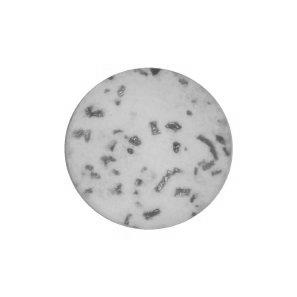

In [3]:
im = Image.open("data_grayscale/test/images/229.jpg")
im

In [21]:
pim = Cartesian2Polar.project_cartesian_image_into_polar_image(im, origin=None)
pim

RuntimeError: invalid shape for coordinate array

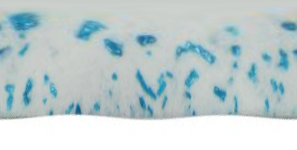

In [12]:
pim.crop(box=(0,0,pim.width,150))

In [22]:
def cart_to_polar_by_filepath(src,dest,crop_height=10000, crop_width=10000, rotate_count=0):

    cart_im = Image.open(src)
    polar_im = Cartesian2Polar.project_cartesian_image_into_polar_image(cart_im, origin=None)
    
    crop_height=min(crop_height,polar_im.height)
    crop_width=min(crop_width,polar_im.width)
    cropped_polar_im = polar_im.crop(box=(0,0,crop_width,crop_height))
    
    cropped_polar_im.save(dest)
    
    
    
    if (rotate_count>0):
        fname, fext = os.path.splitext(dest)
        #print(fname + "  ---  " + fext)
        for x in range(rotate_count):
            angle=randint(0,360)
            
            rotated_cart_im = cart_im.rotate(angle)
            rotated_polar_im = Cartesian2Polar.project_cartesian_image_into_polar_image(rotated_cart_im, origin=None)
            cropped_rotated_polar_im = rotated_polar_im.crop(box=(0,0,crop_width,crop_height))
            rotated_fname = fname + "_" + str(angle)
            rotated_dest = rotated_fname + fext
            cropped_rotated_polar_im.save(rotated_dest)
        

In [23]:
def image_to_grayscale_by_filepath(src,dest):

    im = Image.open(src).convert('L')
    im.save(dest)
       

In [24]:
import os, shutil
from random import randint

root_src_dir = 'data_with_rotations/'    #Path/Location of the source directory
root_dst_dir = 'data_grayscale_with_rotations/'  #Path to the destination folder

for src_dir, dirs, files in os.walk(root_src_dir):
    dst_dir = src_dir.replace(root_src_dir, root_dst_dir, 1)
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)
    for file_ in files:
        src_file = os.path.join(src_dir, file_)
        dst_file = os.path.join(dst_dir, file_)
        if os.path.exists(dst_file):
            os.remove(dst_file)
        #shutil.copy(src_file, dst_dir)
        image_to_grayscale_by_filepath(src_file,dst_file)
        